# Contextualizing the purpose of the project

![New York City schoolbus](schoolbus.jpg)

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a maximum score of 800 points. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

# Variables present on the original .csv file

`school_name` the name of each school present on the file

`borough` the neighborhood that each school is located

`building_code` the code of each school building

`average_math` the average obtained by the students on math discipline

`average_reading` the average obtained by the students on reading skills

`average_writing` the average obtained by the students on reading skills

`percent_tested` the percentage of students that did the SAT exam

# Starting the investigation of the data

In [73]:
# Re-run this cell 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


First let's take care and check for the data types, missing values as well as duplicated values

In [74]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB


In [76]:
missing_percent_tested = (schools['percent_tested']
                          .isna()
                          .value_counts(normalize=True)
                          .round(2))
missing_percent_tested

False    0.95
True     0.05
Name: percent_tested, dtype: float64

In order to fill the 5% data missing on the percent_tested feature we must assess how this data is distributed to choose the best central tendency to use as filling.

Hence the `percent_tested` is a numeric continuous variable type we may treat it using a distribution plot based on the probability of a given event occur. To find the values on a specific range one can use the probability density function (PDF).

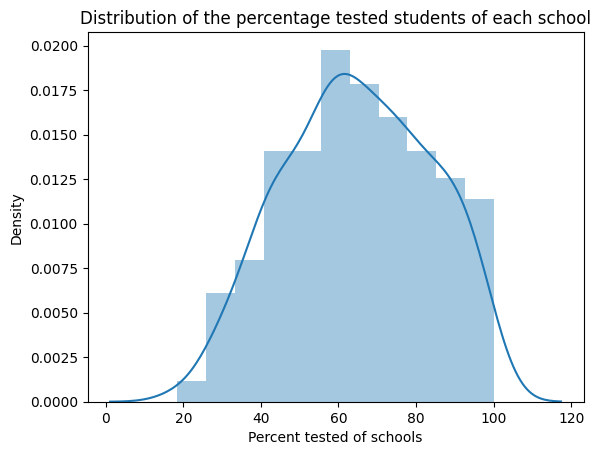

In [78]:
sns.distplot(schools['percent_tested'])
plt.xlabel('Percent tested of schools')
plt.title('Distribution of the percentage tested students of each school')
plt.show()

In [79]:
schools['percent_tested'].describe().round(2)

count    355.00
mean      64.98
std       18.75
min       18.50
25%       50.95
50%       64.80
75%       79.60
max      100.00
Name: percent_tested, dtype: float64

As the median and mean has both close values (they differ on about 0.18%) and together with the distribution of the data that resembles a bell-shaped curve we are allowed to use as filling the mean

In [80]:
(schools['percent_tested']
 .fillna(schools['percent_tested'].mean().round(2),inplace=True))
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   375 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB


As one may check, the data types are in agreement with the expected and there are no missing values. Let's move forward towards the possible duplicated values.

In [81]:
schools.duplicated().sum()

0

There are no duplicated values. Now we may start to answer some questions.

# Questions

## 1) Which are the top 10 schools considering only the math content?

First, I will treat the data in order to generate a percentage distribution of the math percentage for each school.

Once the maximum score is 800 I can proceed as below

In [82]:
maximum_score = 800
schools['math_percentage'] = (schools['average_math'] / maximum_score).round(2)
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,math_percentage
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,64.98,0.82
1,Essex Street Academy,Manhattan,M445,395,411,387,78.90,0.49
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.10,0.52
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.90,0.77
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.70,0.51


The top 10 schools considering only the math skill are the following

In [83]:
best_math_schools = (schools
                     .loc[schools['math_percentage'] >= 0.8, ['school_name','average_math']]
                     .sort_values(by='average_math', ascending=False)
                     .reset_index(drop=True))
best_math_schools

,school_name,average_math
0,Stuyvesant High School,754
1,Bronx High School of Science,714
2,Staten Island Technical High School,711
3,Queens High School for the Sciences at York Co...,701
4,"High School for Mathematics, Science, and Engi...",683
5,Brooklyn Technical High School,682
6,Townsend Harris High School,680
7,High School of American Studies at Lehman College,669
8,"New Explorations into Science, Technology and ...",657
9,Eleanor Roosevelt High School,641


## 2) Which are the top 10 schools considering its total SAT? 

Identifying the top 10 schools according to the average of the three skills avaluated on the SAT exam

In [84]:
schools['total_SAT'] = (schools
                        .loc[:,['average_math','average_reading','average_writing']]
                        .sum(axis=1))
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,math_percentage,total_SAT
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,64.98,0.82,1859
1,Essex Street Academy,Manhattan,M445,395,411,387,78.90,0.49,1193
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.10,0.52,1261
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.90,0.77,1529
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.70,0.51,1197


In [85]:
top_10_schools = (schools
                  .sort_values(by='total_SAT', ascending=False)
                  .reset_index(drop=True)
                  .head(10))[['school_name','total_SAT']]
top_10_schools

,school_name,total_SAT
0,Stuyvesant High School,2144
1,Bronx High School of Science,2041
2,Staten Island Technical High School,2041
3,High School of American Studies at Lehman College,2013
4,Townsend Harris High School,1981
5,Queens High School for the Sciences at York Co...,1947
6,Bard High School Early College,1914
7,Brooklyn Technical High School,1896
8,Eleanor Roosevelt High School,1889
9,"High School for Mathematics, Science, and Engi...",1889


## 3) Which borough has the largest standard deviation when compared its schools?

Creating a data frame named `largest_dev_std` which will be filled afterwards with the number of schools on each borough (`num_schools`), the average SAT per borough (`average_SAT`) and the standard deviation of the SAT results of each borough (`std_SAT`). Its index it's the boroughs given on the `school` data frame

In [89]:
largest_std_dev = (schools
                   .groupby('borough')['total_SAT']
                   .agg(['count',np.mean,np.std])
                   .round(2)
                   .rename(columns={'mean':'average_SAT',
                                    'std':'std_SAT',
                                    'count':'num_schools'}))
largest_std_dev

,num_schools,average_SAT,std_SAT
borough,,,
Bronx,98,1202.72,150.39
Brooklyn,109,1230.26,154.87
Manhattan,89,1340.13,230.29
Queens,69,1345.48,195.25
Staten Island,10,1439.00,222.30


Discoverying the NYC borough with the largest standard deviation

In [68]:
largest_std_dev.loc[largest_std_dev['std_SAT'].idxmax()].name

'Manhattan'

Thus, the borough with the largest standard deviation is Manhattan

# Conclusions

- The three goals were achieved with success;
- The top 10 schools on math were listed as well as the top 10 schools considering all the criteria evaluated on SAT;
- The borough with the largest standard deviation between schools is Manhattan. This event may be conditionated to some social problems such as social inequality that is exposed by Chen on https://ny1.com/nyc/all-boroughs/news-all-day/2023/10/04/report-says-income-inequality-in-three-boroughs-among-worst-in-u-s- . To confirm if the social inequality corroborates with that stat, hypothesis tests and more variables must be taken into account - maybe in a future project.